In [19]:
import fsps
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
%matplotlib inline
text_size = 20

# Problem 1
In one concise paragraph, summarize the so-called "G-Dwarf Problem" and indicate possible solutions and/or implications.

The "G Dwarf Problem" is the discrepancy between the height/slope of the [Fe/H] metallicity peak compared to that derived from a simple closed box model (a closed box evolutionary model is one where all metal enrichment is self-enrichment through stellar evolution/SN, there is a lack of inflows/outflows of gas). This leads to an apparent deficit in observed metal poor G dwarf stars compared with closed box evolutionary models. This inconsistency has been observed in a variety of regions of our own galaxy along with in other bulge-dominated and disk-dominated galaxies. There may be many sources for this discrepancy, one being a fundamental problem with the closed box model. This model excludes the possibility of pristine or processed gas inflows or produced metals being completely lost through high energy expulsion by SN. Additionally, another room for uncertainty is the true nature of the IMF, which could have an impact on the expected stellar mass and metallicity distribution. For example, an IMF with more high mass stars can lead to more feedback and/or more metal production than one with less high mass stars. Overall, there are many factors that must be taken into account since fundamentally the closed box model ignores an appreciable amount of important processes in the evolution of galaxies.

# Problem 2
Bouwens et al. 2015 report rest frame UV luminosity functions from z ~ 4-8 in Table 5. Using emcee, fit a Schechter function to the data at z = 4,6,8. How do your constraints on the three Schechter function parameters compare to what is reported in the Bouwens et al. paper? If the results do not agree, comment on the possible sources of the discrepancies.

In [235]:
#data from Bouwens+2015
z4_m1600 = np.array([-22.69, -22.19, -21.69, -21.19, -20.69, -20.19, -19.69, -19.19,
            -18.69, -18.19, -17.69, -16.94, -15.94])
z4_phi = np.array([0.000003, 0.000015, 0.000134, 0.000393, 0.000678, 0.001696, 0.002475,
          0.002984, 0.005352, 0.006865, 0.010473, 0.024580, 0.025080])
z4_phi_err = np.array([0.000004, 0.000009, 0.000023, 0.000040, 0.000063, 0.000113, 0.000185,
              0.000255, 0.000446, 0.001043, 0.002229, 0.003500, 0.007860])
z6_m1600 = np.array([-22.52, -22.02, -21.52, -21.02, -20.52, -20.02, -19.52, -18.77, -17.77, -16.77])
z6_phi = np.array([0.000002, 0.000015, 0.000053, 0.000176, 0.000320, 0.000698,
          0.001246, 0.001900, 0.006680, 0.013640])
z6_phi_err = np.array([0.000002, 0.000006, 0.000012, 0.000025, 0.000041, 0.000083, 
              0.000137, 0.000320, 0.001380, 0.004200])
z8_m1600 = np.array([-22.87, -22.37, -21.87, -21.37, -20.87, -20.37, -19.87, -19.37, -18.62, -17.62])
z8_phi = np.array([ 0.000002, 0.000002, 0.000005, 0.000013, 0.000058, 0.000060, 
          0.000331, 0.000533, 0.001060, 0.002740])
z8_phi_err = np.array([0.000002,0.000002, 0.000003, 0.000005, 0.000015, 0.000026, 0.000104,
              0.000226, 0.000340, 0.001040])


For this problem we are fitting parameters to the Schechter function in terms of magnitude, which is the following,
$$ \phi(M)= 0.4ln(10) \phi^* 10^{-0.4(M-M^*)(\alpha+1)}e^{-10^{-0.4(M-M^*)}}$$
where M is the magnitude and we need to fit for $\alpha, \phi^* and \ M^*$

In [226]:
#define ranges for the three Schechter Function parameters
m_star_min = -25.0
m_star_max = -15.0
alpha_min = -3.5
alpha_max = -1.
phi_star_max = -2.
phi_star_min = -5.

def ln_like(theta, mags, phi, phi_err):
    """Likelihood function that minimizes the residual between
    the luminosity data and the trial schechter fit using the least squares method."""
    alpha, m_star, log_phi_star = theta
    phi_test = 0.4*np.log(10.0)*10**log_phi_star*10**(-0.4*(mags - m_star)*(alpha + 1))*np.exp(-10**(-0.4*(mags-m_star)))
    phi_err = np.asarray(phi_err)
    return -0.5*np.sum(((phi_test-phi)/phi_err)**2.0+np.log(2.0*np.pi*phi_err**2.0))

def lnprior(theta):
    """Prior function that assumed top hat priors for all three Schechter parameters."""
    alpha, m_star, log_phi_star = theta
    if -3.5 < alpha < -1. and -25.0 < m_star < -15.0 and -5. < log_phi_star < -2.: 
        return 0.0 
    return -np.inf

def lnprob(theta, mags, phi, phi_err):
    """Combination of the prior and likelihood function to get the probability"""
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp +  ln_like(theta, mags, phi, phi_err)  

# z = 4

In [194]:
#initialize emcee for z = 4 using the Bouwens+2015 data
n_walkers4 = 300
ndim4 = 3
initial4 = np.array([np.random.rand(ndim4) for i in range(n_walkers4)])
initial4[:,0] = initial4[:,0]*(1e-2)-2.
initial4[:,1] = initial4[:,1]*(1e-2)-20.
initial4[:,2] = initial4[:,2]*(1e-2)-3.0
sampler4 = emcee.EnsembleSampler(n_walkers4, ndim4, lnprob, args=[z4_m1600,z4_phi,z4_phi_err])

#burn in, then reset sampler
pos4, prob4, state4 = sampler4.run_mcmc(initial4, 1000)
sampler4.reset()
sampler4.run_mcmc(pos4, 1000, rstate0 = state4)

(array([[ -1.65808073, -21.0068896 ,  -2.83127412],
        [ -1.71477812, -20.96765679,  -2.82814649],
        [ -1.65998925, -20.84409917,  -2.75152296],
        [ -1.54347149, -20.75322146,  -2.63941696],
        [ -1.64182653, -20.88531477,  -2.72987235],
        [ -1.61948257, -20.86667871,  -2.73272719],
        [ -1.73609578, -20.95654233,  -2.82075629],
        [ -1.62621333, -20.78991822,  -2.68840818],
        [ -1.56014081, -20.75914561,  -2.66052202],
        [ -1.54913603, -20.61669729,  -2.58177767],
        [ -1.69767578, -20.96928207,  -2.80210409],
        [ -1.4953002 , -20.75047588,  -2.60634435],
        [ -1.70085199, -21.02606796,  -2.85733861],
        [ -1.6662454 , -21.00739711,  -2.82524303],
        [ -1.69208244, -20.87007825,  -2.76654781],
        [ -1.73637221, -21.03775352,  -2.89587232],
        [ -1.70032125, -20.96144791,  -2.80046363],
        [ -1.64558408, -20.87323371,  -2.74875784],
        [ -1.68459199, -20.93211449,  -2.79712414],
        [ -1

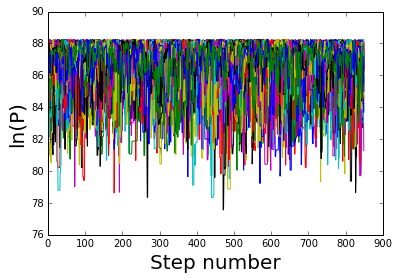

In [205]:
#Plot of ln(P) vs Step Number
plt.figure(1)
[plt.plot(sampler4.lnprobability[i,150:]) for i in range(100)]
plt.xlabel(r'Step number', fontsize = text_size)
plt.ylabel(r'ln(P)', fontsize = text_size)
plt.show()

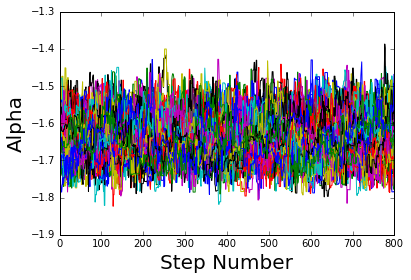

In [206]:
plt.figure(2)
[plt.plot(sampler4.chain[i,200:,0]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'Alpha', fontsize = text_size)

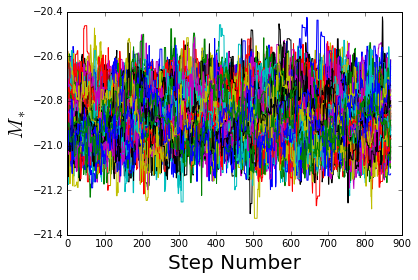

In [207]:
plt.figure(3)
[plt.plot(sampler4.chain[i,130:,1]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'$M_*$', fontsize = text_size)

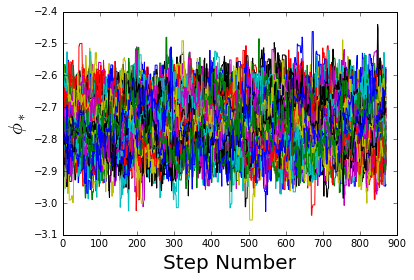

In [208]:
plt.figure(4)
[plt.plot(sampler4.chain[i,130:,2]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'$\phi_*$', fontsize = text_size)

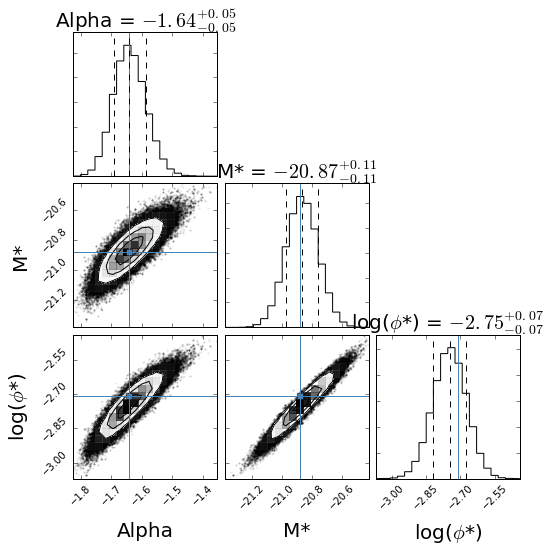

In [211]:
corner_plot = corner.corner(sampler4.flatchain[100:,:], labels = ['Alpha','M*', 'log($\phi$*)'], show_titles = True,\
              plot_contours = True, quantiles = [0.16,0.5,0.84], truths = [-1.64, -20.88, -2.71],
                           label_kwargs={"fontsize": 20}, title_kwargs={"fontsize": 20})
corner_plot.show()

# z = 6

In [193]:
#initialize emcee for z = 6 using the Bouwens+2015 data
n_walkers6 = 300
ndim6 = 3
initial6 = np.array([np.random.rand(ndim6) for i in range(n_walkers6)])
initial6[:,0] = initial6[:,0]*(1e-2)-2.
initial6[:,1] = initial6[:,1]*(1e-2)-20.
initial6[:,2] = initial6[:,2]*(1e-2)-3.0
sampler6 = emcee.EnsembleSampler(n_walkers6, ndim6, lnprob, args=[z6_m1600,z6_phi,z6_phi_err])

#burn in, then reset sampler
pos6, prob6, state6 = sampler6.run_mcmc(initial6, 1000)
sampler6.reset()
sampler6.run_mcmc(pos6, 1000, rstate0 = state6)

(array([[ -1.73268068, -20.75489122,  -3.13528498],
        [ -1.77091566, -20.99501386,  -3.31232544],
        [ -1.84851587, -20.95590453,  -3.27712534],
        [ -1.84299684, -20.95789328,  -3.22875163],
        [ -1.75257881, -20.82668832,  -3.1385892 ],
        [ -2.02168204, -21.34336364,  -3.58127912],
        [ -1.97133815, -21.1602059 ,  -3.42285401],
        [ -1.71259787, -20.58212362,  -3.01476225],
        [ -1.84174786, -20.93114164,  -3.27485106],
        [ -1.88575021, -20.99323883,  -3.32584011],
        [ -1.74937862, -20.84287931,  -3.18336901],
        [ -1.80392709, -20.88764122,  -3.20374854],
        [ -1.9323163 , -21.16155309,  -3.44288909],
        [ -1.85162037, -21.02787497,  -3.29175291],
        [ -1.86412068, -20.99817947,  -3.28927504],
        [ -1.87196474, -20.95120677,  -3.33868936],
        [ -1.94010871, -20.88419626,  -3.23946404],
        [ -1.98967564, -21.24098455,  -3.48663734],
        [ -1.97202256, -21.10335134,  -3.41730636],
        [ -1

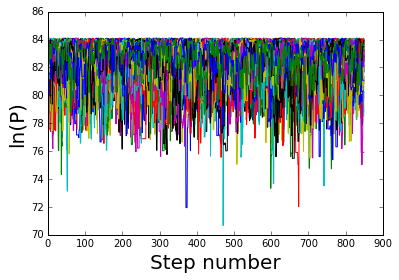

In [195]:
#Plot of ln(P) vs Step Number
plt.figure(5)
[plt.plot(sampler6.lnprobability[i,150:]) for i in range(100)]
plt.xlabel(r'Step number', fontsize = text_size)
plt.ylabel(r'ln(P)', fontsize = text_size)
plt.show()

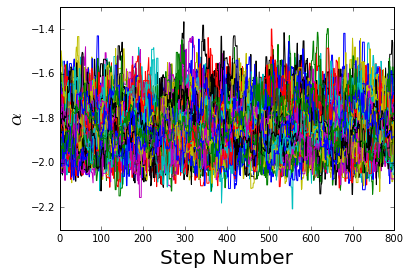

In [199]:
plt.figure(6)
[plt.plot(sampler6.chain[i,200:,0]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'$\alpha$', fontsize = text_size)

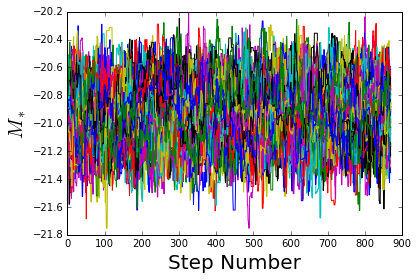

In [185]:
plt.figure(7)
[plt.plot(sampler6.chain[i,130:,1]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'$M_*$', fontsize = text_size)

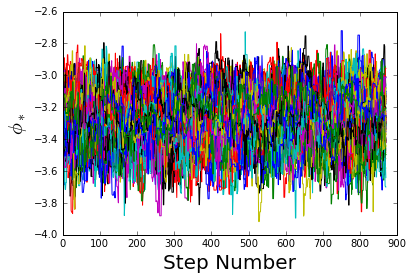

In [200]:
plt.figure(8)
[plt.plot(sampler6.chain[i,130:,2]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'$\phi_*$', fontsize = text_size)

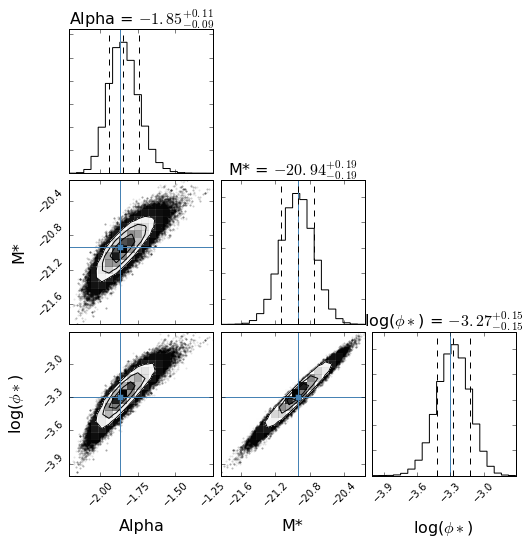

In [201]:
corner_plot = corner.corner(sampler6.flatchain[100:,:], labels = ['Alpha','M*', 'log($\phi*$)'], show_titles = True,\
              plot_contours = True, quantiles = [0.16,0.5,0.84], truths = [-1.87, -20.94, -3.3],
                           label_kwargs={"fontsize": 16}, title_kwargs={"fontsize": 16})
corner_plot.show()

# z = 8

In [228]:
#initialize emcee for z = 8 using the Bouwens+2015 data
n_walkers8 = 300
ndim8 = 3
initial8 = np.array([np.random.rand(ndim8) for i in range(n_walkers8)])
#make initial values close to target values
initial8[:,0] = initial8[:,0]*(1e-2)-2.
initial8[:,1] = initial8[:,1]*(1e-2)-20.
initial8[:,2] = initial8[:,2]*(1e-2)-3.6
sampler8 = emcee.EnsembleSampler(n_walkers8, ndim8, lnprob, args=[z8_m1600,z8_phi,z8_phi_err])

#burn in, then reset sampler
pos8, prob8, state8 = sampler8.run_mcmc(initial8, 1000)
sampler8.reset()
sampler8.run_mcmc(pos8, 3000, rstate0 = state8)

(array([[ -2.32610643, -22.2459116 ,  -4.96372693],
        [ -2.12041004, -21.03498918,  -4.06540874],
        [ -2.37435153, -21.42354122,  -4.41752025],
        [ -2.44088335, -21.92249016,  -4.78910792],
        [ -2.3349327 , -21.09430652,  -4.22312132],
        [ -2.22617784, -20.95291503,  -4.15952848],
        [ -1.91234678, -20.43769662,  -3.58718672],
        [ -2.03944379, -21.03613315,  -3.98856055],
        [ -2.38880294, -22.00295308,  -4.81555012],
        [ -1.94581467, -20.94855148,  -3.89914728],
        [ -1.96682848, -20.82196519,  -3.81223583],
        [ -1.86889965, -20.36509764,  -3.55240592],
        [ -2.27286487, -21.65846311,  -4.61431173],
        [ -1.61299135, -20.37998178,  -3.62234009],
        [ -2.13191989, -21.467404  ,  -4.26611284],
        [ -2.31191243, -21.75329787,  -4.571379  ],
        [ -2.0335945 , -20.54098428,  -3.63216759],
        [ -2.33090073, -21.44786543,  -4.55708284],
        [ -2.23746849, -21.7137052 ,  -4.60254071],
        [ -2

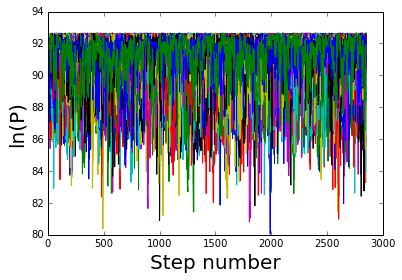

In [214]:
plt.figure(9)
[plt.plot(sampler8.lnprobability[i,150:]) for i in range(100)]
plt.xlabel(r'Step number', fontsize = text_size)
plt.ylabel(r'ln(P)', fontsize = text_size)
plt.show()

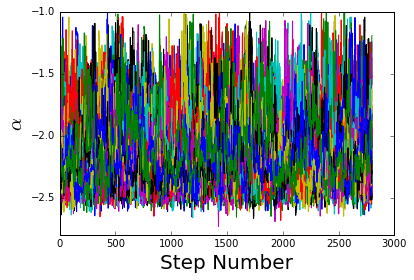

In [215]:
plt.figure(10)
[plt.plot(sampler8.chain[i,200:,0]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'$\alpha$', fontsize = text_size)

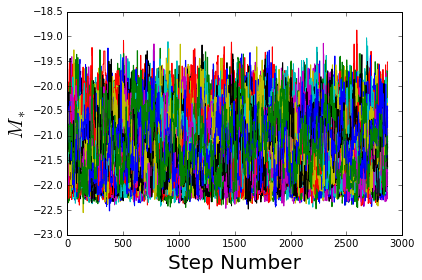

In [216]:
plt.figure(11)
[plt.plot(sampler8.chain[i,130:,1]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'$M_*$', fontsize = text_size)

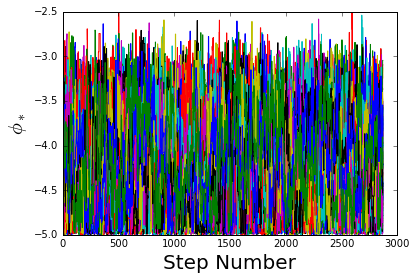

In [217]:
plt.figure(12)
[plt.plot(sampler8.chain[i,130:,2]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'$\phi_*$', fontsize = text_size)

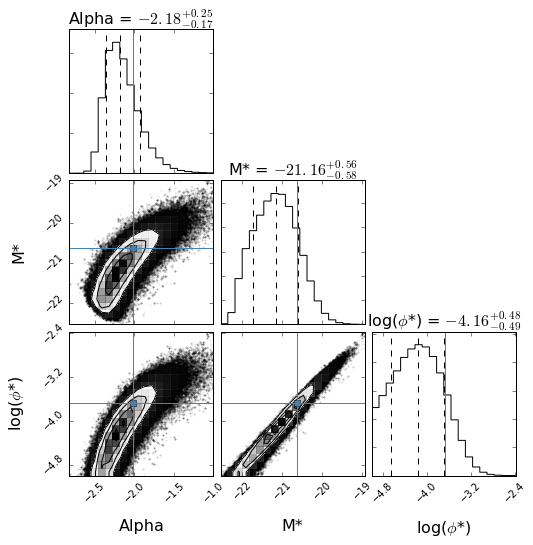

In [229]:
corner_plot = corner.corner(sampler8.flatchain[100:,:], labels = ['Alpha','M*', 'log($\phi$*)'], show_titles = True,\
              plot_contours = True, quantiles = [0.16,0.5,0.84], truths = [-2.02, -20.63, -3.67],
                           label_kwargs={"fontsize": 16}, title_kwargs={"fontsize": 16})
corner_plot.show()

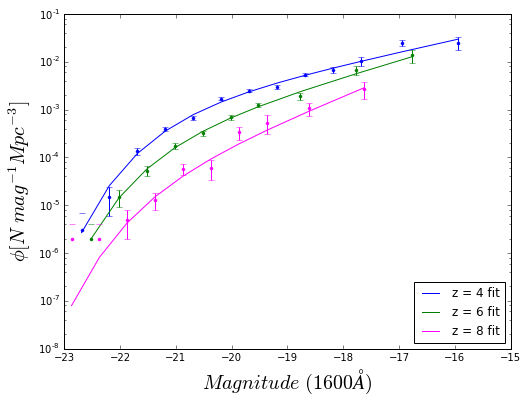

In [244]:
#plot the data with the emcee fits
def schechter(mags, alpha, m_star, phi_star):
    return 0.4*np.log(10.0)*phi_star*10**(-0.4*(mags - m_star)*(alpha + 1))*np.exp(-10**(-0.4*(mags-m_star)))
phi_star4 = 10**(-2.75)
m_star4 = -20.87
alpha4 = -1.64
phi4 = schechter(z4_m1600, alpha4, m_star4, phi_star4)
phi_star6 = 10**(-3.27)
m_star6 = -20.94
alpha6 = -1.85
phi6 = schechter(z6_m1600, alpha6, m_star6, phi_star6)
phi_star8 = 10**(-4.16)
m_star8 = -21.16
alpha8 = -2.18
phi8 = schechter(z8_m1600, alpha8, m_star8, phi_star8)

fig, ax = plt.subplots(figsize = (8,6))
ax.errorbar(z4_m1600,z4_phi, yerr = z4_phi_err, fmt = '.', color = 'blue')
ax.semilogy(z4_m1600, phi4, color = 'blue', label = 'z = 4 fit')
ax.errorbar(z6_m1600,z6_phi, yerr = z6_phi_err, fmt = '.', color = 'green')
ax.semilogy(z6_m1600, phi6, color = 'green', label = 'z = 6 fit')
ax.errorbar(z8_m1600,z8_phi, yerr = z8_phi_err, fmt = '.', color = 'magenta')
ax.semilogy(z8_m1600, phi8, color = 'magenta', label = 'z = 8 fit')
ax.set_ylabel('$\phi[N \ mag^{-1}Mpc^{-3}]$', fontsize = text_size)
ax.set_xlabel('$Magnitude \ (1600 \AA)$', fontsize = text_size)
ax.set_xlim(-23,-15)
plt.legend(loc =4)
plt.show()


In [251]:
#compare to Bouwens et al 2015 values
phi_star4b = 1.97e-3
m_star4b = -20.88
alpha4b = -1.64
phi4b = schechter(z4_m1600, alpha4b, m_star4b, phi_star4b)
phi_star6b = 0.5e-3
m_star6b = -20.94
alpha6b = -1.87
phi6b = schechter(z6_m1600, alpha6b, m_star6b, phi_star6b)
phi_star8b = 0.21e-3
m_star8b = -20.63
alpha8b = -2.02
phi8b = schechter(z8_m1600, alpha8b, m_star8b, phi_star8b)

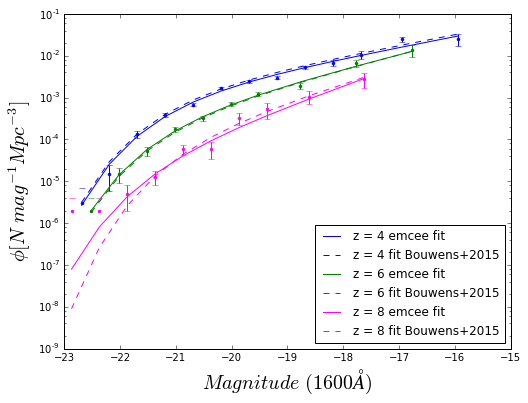

In [254]:
#plot data, emcee fits and Bouwens best fits for z = 4,6,8
fig, ax = plt.subplots(figsize = (8,6))
ax.errorbar(z4_m1600,z4_phi, yerr = z4_phi_err, fmt = '.', color = 'blue')
ax.semilogy(z4_m1600, phi4, color = 'blue', label = 'z = 4 emcee fit')
ax.semilogy(z4_m1600, phi4b,'--', color = 'blue', label = 'z = 4 fit Bouwens+2015')
ax.errorbar(z6_m1600,z6_phi, yerr = z6_phi_err, fmt = '.', color = 'green')
ax.semilogy(z6_m1600, phi6, color = 'green', label = 'z = 6 emcee fit')
ax.semilogy(z6_m1600, phi6b,'--', color = 'green', label = 'z = 6 fit Bouwens+2015')
ax.errorbar(z8_m1600,z8_phi, yerr = z8_phi_err, fmt = '.', color = 'magenta')
ax.semilogy(z8_m1600, phi8, color = 'magenta', label = 'z = 8 emcee fit')
ax.semilogy(z8_m1600, phi8b,'--', color = 'magenta', label = 'z = 8 fit Bouwens+2015')
ax.set_ylabel('$\phi[N \ mag^{-1}Mpc^{-3}]$', fontsize = text_size)
ax.set_xlabel('$Magnitude \ (1600 \AA)$', fontsize = text_size)
ax.set_xlim(-23,-15)
plt.legend(loc =4)
plt.show()

The best fits from Bouwens et al. 2015 agree fairly well with the z = 4 and 6 plots, diverging more in the z = 8 fit. This may be due to there being less data for z = 8, including two points that were only upper limits.